In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
sns.set()
from sklearn.decomposition import PCA

from matplotlib.colors import ListedColormap

In [2]:
dataset = pd.read_csv('wine.csv')
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values
dataset.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
dataset.tail()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [4]:
dataset.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# Data preprocessing

In [5]:
# not going to falloe EDA step here since it is already done in link1.(Above cell)
# as we know ID & award will not make much contribution during clutering. we will drop both columns.

dataset1 =  dataset.drop(['Type'], axis=1)
dataset1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


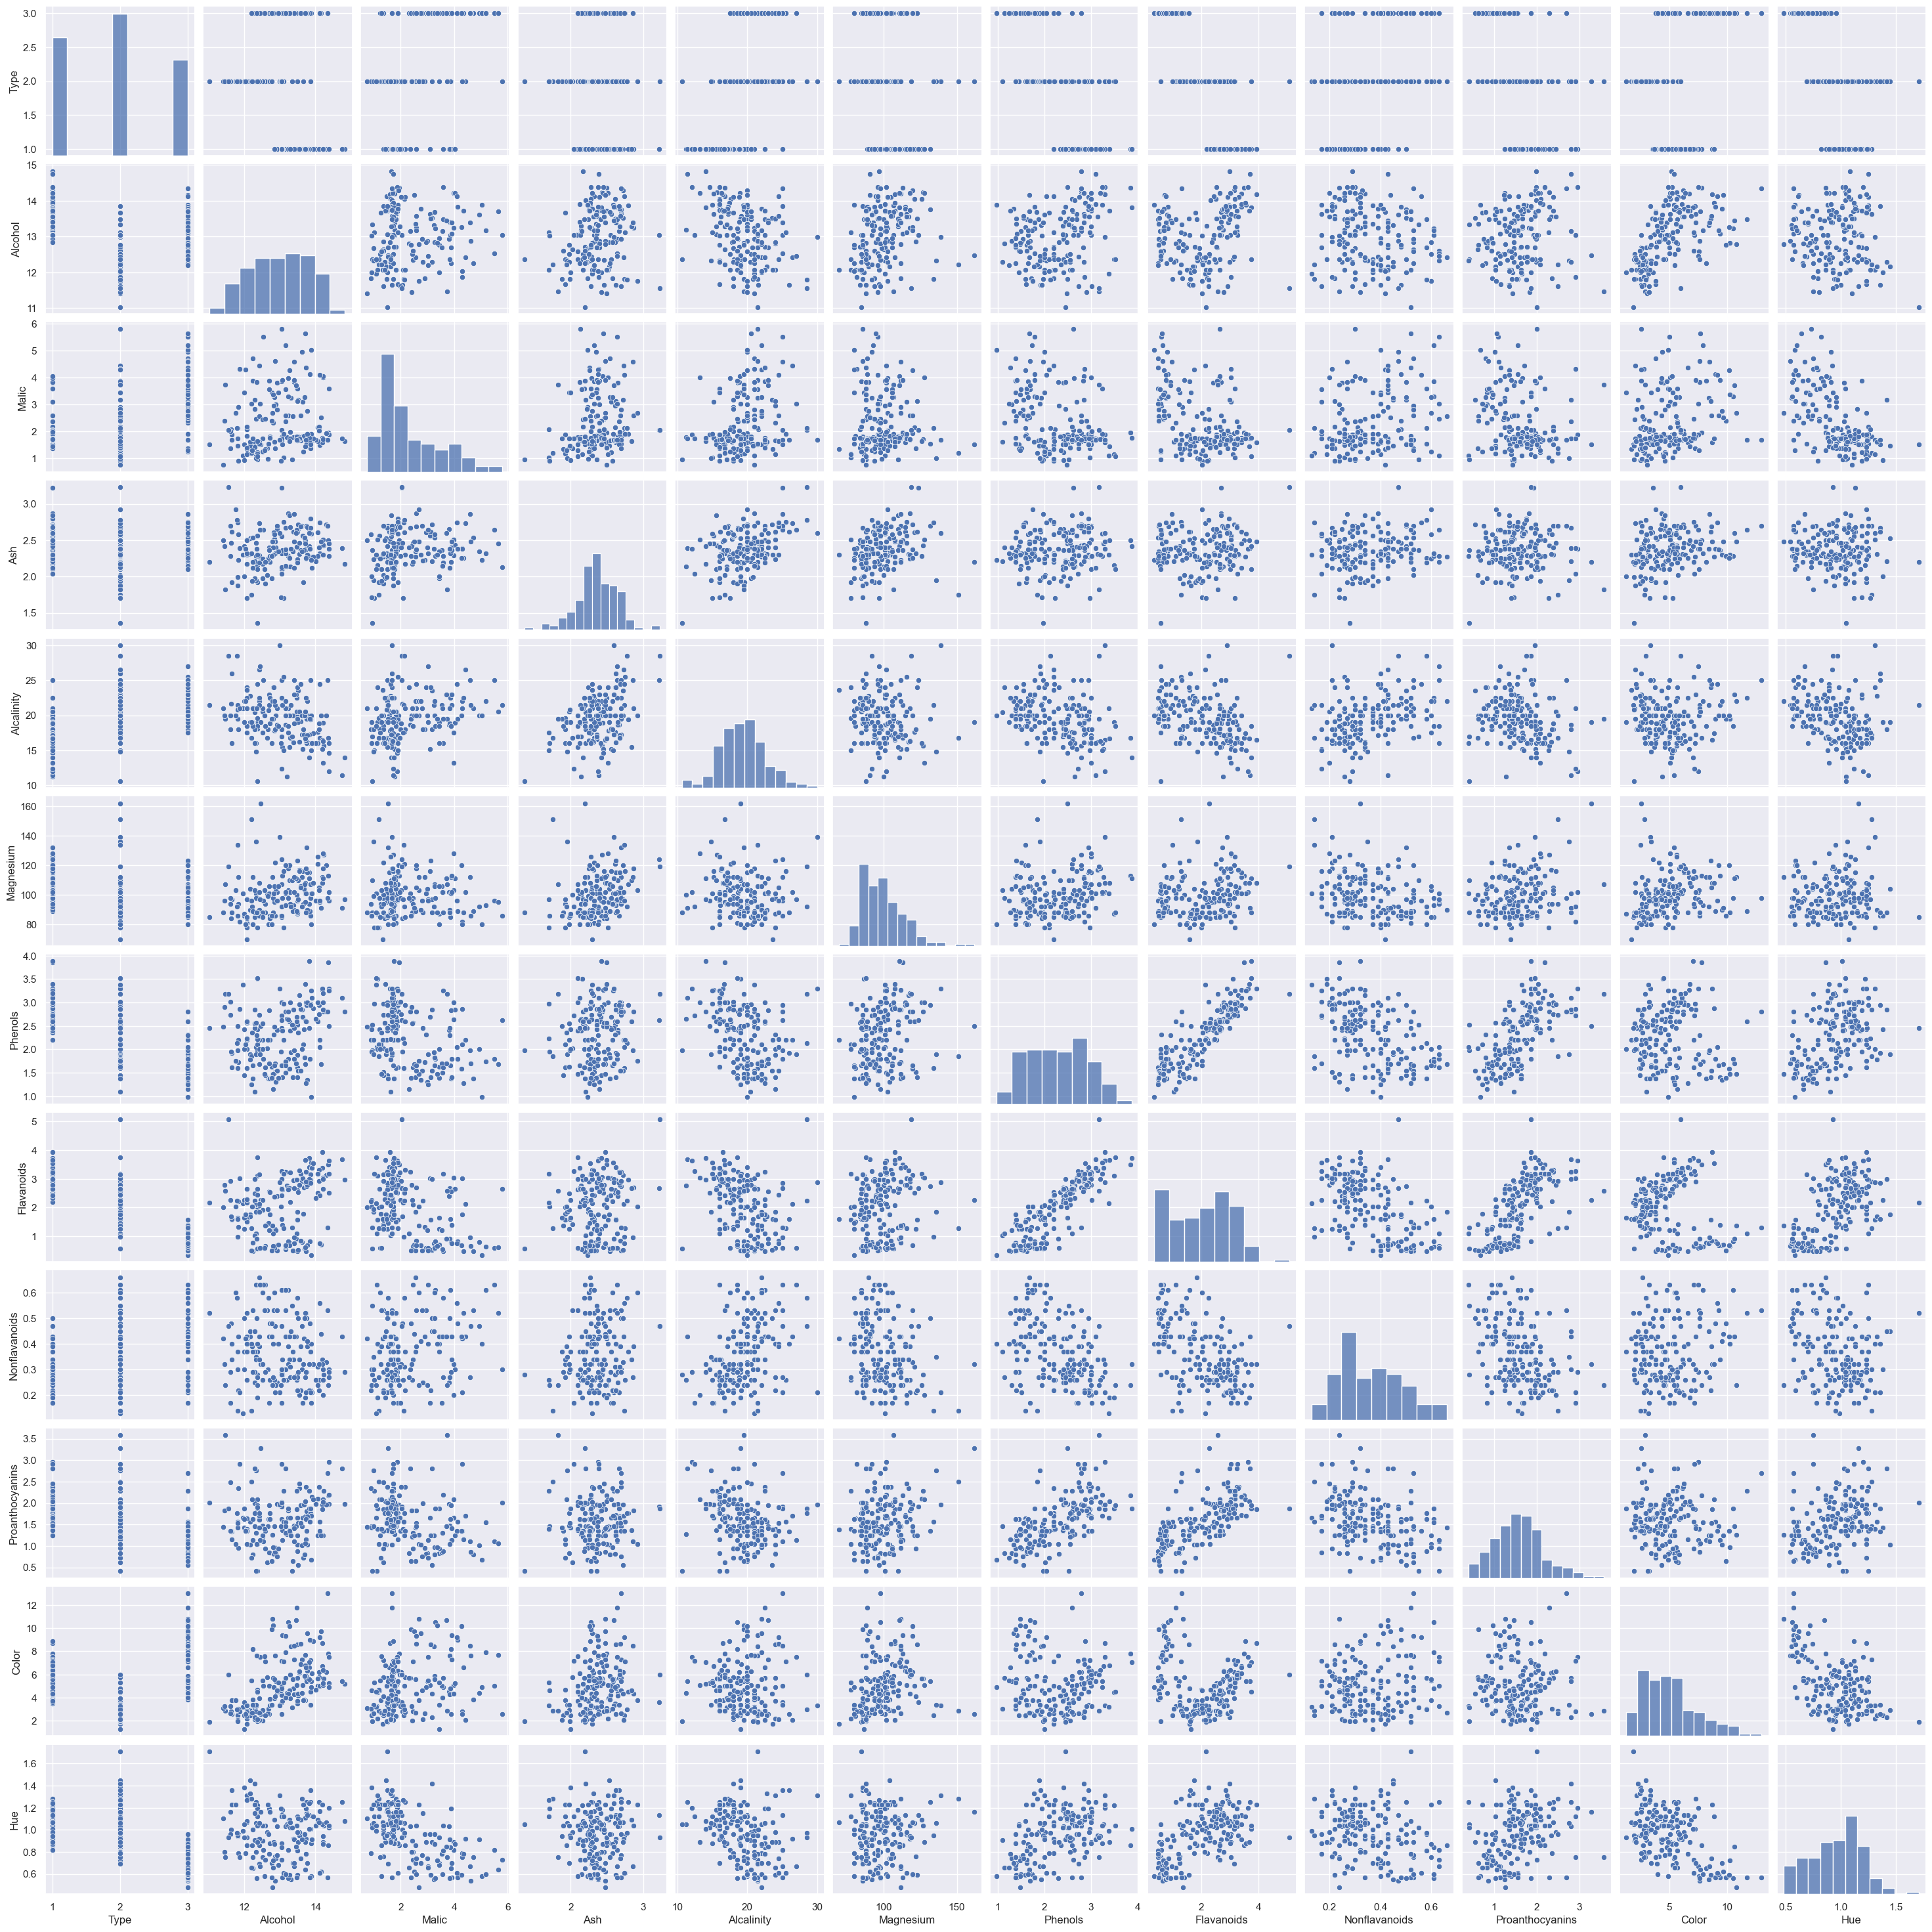

In [7]:
sns.pairplot(dataset.iloc[:,0:12])

# Normalizing data for any type of clustering

In [8]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
df_norm = norm_func(dataset.iloc[:,1:])
print(df_norm)

      Alcohol     Malic       Ash  Alcalinity  Magnesium   Phenols  \
0    0.842105  0.191700  0.572193    0.257732   0.619565  0.627586   
1    0.571053  0.205534  0.417112    0.030928   0.326087  0.575862   
2    0.560526  0.320158  0.700535    0.412371   0.336957  0.627586   
3    0.878947  0.239130  0.609626    0.319588   0.467391  0.989655   
4    0.581579  0.365613  0.807487    0.536082   0.521739  0.627586   
..        ...       ...       ...         ...        ...       ...   
173  0.705263  0.970356  0.582888    0.510309   0.271739  0.241379   
174  0.623684  0.626482  0.598930    0.639175   0.347826  0.282759   
175  0.589474  0.699605  0.481283    0.484536   0.543478  0.210345   
176  0.563158  0.365613  0.540107    0.484536   0.543478  0.231034   
177  0.815789  0.664032  0.737968    0.716495   0.282609  0.368966   

     Flavanoids  Nonflavanoids  Proanthocyanins     Color       Hue  Dilution  \
0      0.573840       0.283019         0.593060  0.372014  0.455285  0.970696 

In [9]:
from sklearn.preprocessing import StandardScaler

std_df = StandardScaler().fit_transform(dataset1)      # this will used for kmeans
std_df.shape

(178, 13)

In [10]:
print(std_df)

[[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]


# Running PCA of standardized data.

In [11]:
# applying PCA on std_df

# we are considering 95% variance in n_components to not loose any data.

from sklearn.decomposition import PCA
pca_std = PCA(random_state=14, n_components=3)
pca_std_df= pca_std.fit_transform(std_df)

In [12]:
print(pca_std_df)

[[ 3.31675081e+00 -1.44346263e+00 -1.65739045e-01]
 [ 2.20946492e+00  3.33392887e-01 -2.02645737e+00]
 [ 2.51674015e+00 -1.03115130e+00  9.82818670e-01]
 [ 3.75706561e+00 -2.75637191e+00 -1.76191842e-01]
 [ 1.00890849e+00 -8.69830821e-01  2.02668822e+00]
 [ 3.05025392e+00 -2.12240111e+00 -6.29395827e-01]
 [ 2.44908967e+00 -1.17485013e+00 -9.77094891e-01]
 [ 2.05943687e+00 -1.60896307e+00  1.46281883e-01]
 [ 2.51087430e+00 -9.18070957e-01 -1.77096903e+00]
 [ 2.75362819e+00 -7.89437674e-01 -9.84247490e-01]
 [ 3.47973668e+00 -1.30233324e+00 -4.22735217e-01]
 [ 1.75475290e+00 -6.11977229e-01 -1.19087832e+00]
 [ 2.11346234e+00 -6.75706339e-01 -8.65086426e-01]
 [ 3.45815682e+00 -1.13062988e+00 -1.20427635e+00]
 [ 4.31278391e+00 -2.09597558e+00 -1.26391275e+00]
 [ 2.30518820e+00 -1.66255173e+00  2.17902616e-01]
 [ 2.17195527e+00 -2.32730534e+00  8.31729866e-01]
 [ 1.89897118e+00 -1.63136888e+00  7.94913792e-01]
 [ 3.54198508e+00 -2.51834367e+00 -4.85458508e-01]
 [ 2.08452220e+00 -1.06113799e+

In [13]:
pca_std_df.shape

(178, 3)

In [14]:
# eigenvalues..

print(pca_std.singular_values_)

[28.94203422 21.08225141 16.04371561]


In [15]:
# variance containing in each formed PCA

print(pca_std.explained_variance_ratio_*100)

[36.1988481  19.20749026 11.12363054]


In [16]:
# Cummulative variance ratio..

# this will give an idea of, at how many no. of PCAs, the cummulative addition of
#........variance will give much information..

cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

array([36.1988481 , 55.40633836, 66.52996889])

# MODEL 1 - KMeans
K-means clustering with PCA

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can a

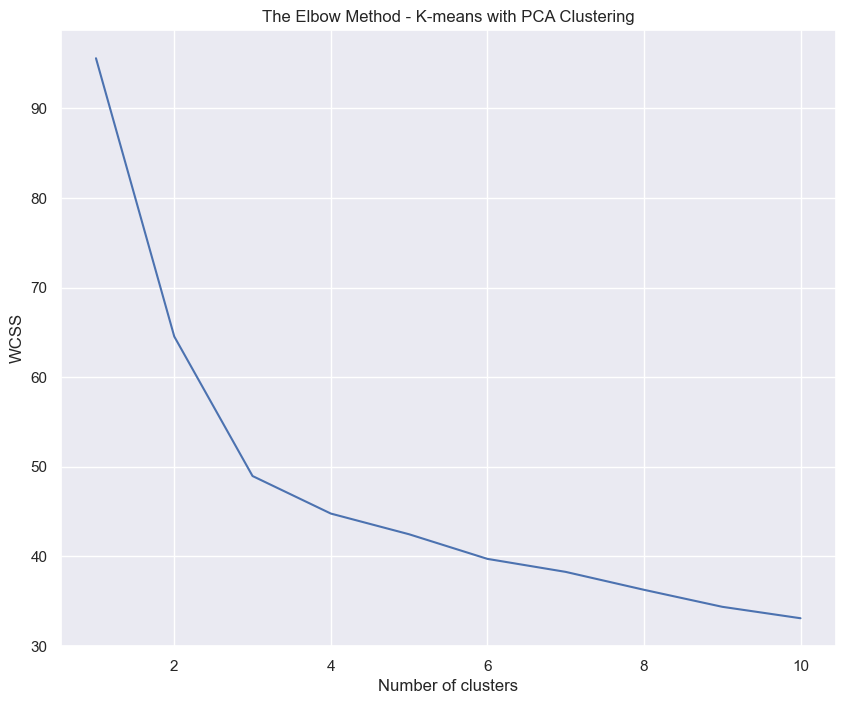

In [17]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_) #criterion based on which K-means clustering works
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method - K-means with PCA Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_norm)

y_kmeans

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8856\3026770324.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_std_df[:,0], pca_std_df[:,1], cmap='tab10')


Text(0, 0.5, 'Second Principal Component')

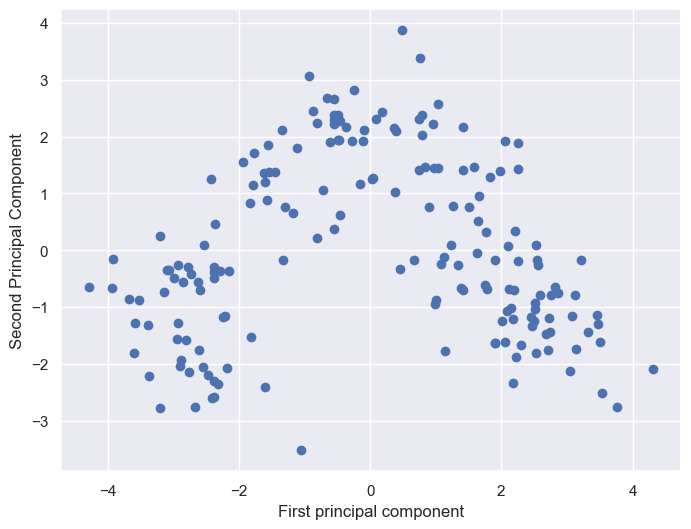

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(pca_std_df[:,0], pca_std_df[:,1], cmap='tab10')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [20]:
pca_kmeans =pd.concat([dataset1.reset_index(drop = True), pd.DataFrame(df_norm)], axis= 1)
pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
pca_kmeans['Segment Kmeans PCA'] = y_kmeans
print(pca_kmeans)

     Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0      14.23   1.71  2.43        15.6        127     2.80        3.06   
1      13.20   1.78  2.14        11.2        100     2.65        2.76   
2      13.16   2.36  2.67        18.6        101     2.80        3.24   
3      14.37   1.95  2.50        16.8        113     3.85        3.49   
4      13.24   2.59  2.87        21.0        118     2.80        2.69   
..       ...    ...   ...         ...        ...      ...         ...   
173    13.71   5.65  2.45        20.5         95     1.68        0.61   
174    13.40   3.91  2.48        23.0        102     1.80        0.75   
175    13.27   4.28  2.26        20.0        120     1.59        0.69   
176    13.17   2.59  2.37        20.0        120     1.65        0.68   
177    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color  ...  Magnesium   Phenols  \
0             0.28             2.29   5.64  ...   0

In [21]:
pca_kmeans['Segment'] = pca_kmeans['Segment Kmeans PCA'].map({0:'First', 1:'Second', 2:'Third'})

# Heirarchial Clustering

In [25]:
print(pca_std_df)

[[ 3.31675081e+00 -1.44346263e+00 -1.65739045e-01]
 [ 2.20946492e+00  3.33392887e-01 -2.02645737e+00]
 [ 2.51674015e+00 -1.03115130e+00  9.82818670e-01]
 [ 3.75706561e+00 -2.75637191e+00 -1.76191842e-01]
 [ 1.00890849e+00 -8.69830821e-01  2.02668822e+00]
 [ 3.05025392e+00 -2.12240111e+00 -6.29395827e-01]
 [ 2.44908967e+00 -1.17485013e+00 -9.77094891e-01]
 [ 2.05943687e+00 -1.60896307e+00  1.46281883e-01]
 [ 2.51087430e+00 -9.18070957e-01 -1.77096903e+00]
 [ 2.75362819e+00 -7.89437674e-01 -9.84247490e-01]
 [ 3.47973668e+00 -1.30233324e+00 -4.22735217e-01]
 [ 1.75475290e+00 -6.11977229e-01 -1.19087832e+00]
 [ 2.11346234e+00 -6.75706339e-01 -8.65086426e-01]
 [ 3.45815682e+00 -1.13062988e+00 -1.20427635e+00]
 [ 4.31278391e+00 -2.09597558e+00 -1.26391275e+00]
 [ 2.30518820e+00 -1.66255173e+00  2.17902616e-01]
 [ 2.17195527e+00 -2.32730534e+00  8.31729866e-01]
 [ 1.89897118e+00 -1.63136888e+00  7.94913792e-01]
 [ 3.54198508e+00 -2.51834367e+00 -4.85458508e-01]
 [ 2.08452220e+00 -1.06113799e+

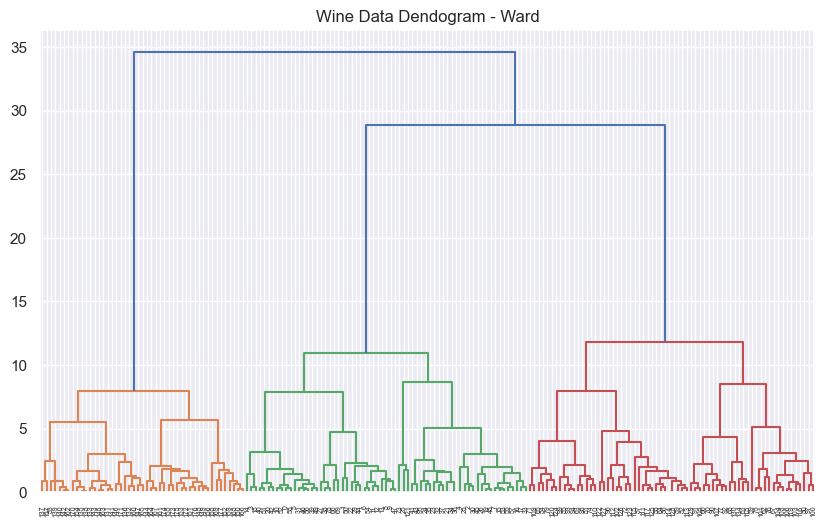

In [26]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 6))
plt.title("Wine Data Dendogram - Ward")
dend = shc.dendrogram(shc.linkage(pca_std_df, method='ward'))